# Solution

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Import data

In [42]:
# Import data
df = pd.read_csv('data/medical_examination.csv')

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Add 'overweight' column

In [43]:
df['overweight'] = df['weight'] / ((df['height'] / 100)**2)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [44]:
df['overweight'] = (df['overweight'] > 25).astype(int)
df.head(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,1
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,1


Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [45]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

df.head(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,1,1,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,1,0,0,0,1,0,1
7,12,22584,2,178,95.0,130,90,1,1,0,0,1,1,1
8,13,17668,1,158,71.0,110,70,0,0,0,0,1,0,1
9,14,19834,1,164,68.0,110,60,0,0,0,0,0,0,1


Draw Categorical Plot

In [46]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = df.melt(id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat.head(10)

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
5,0,cholesterol,1
6,0,cholesterol,1
7,1,cholesterol,1
8,0,cholesterol,0
9,0,cholesterol,0


In [47]:
df_cat['variable'].unique()

array(['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'],
      dtype=object)

In [48]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
df_cat['total'] = 1
df_cat = df_cat.groupby(by=['cardio', 'variable', 'value'], as_index=False)
df_cat.head()

,cardio,variable,value,total
0,0,cholesterol,0,1
1,1,cholesterol,1,1
2,1,cholesterol,1,1
3,1,cholesterol,0,1
4,0,cholesterol,0,1
...,...,...,...,...
350022,1,overweight,1,1
350024,1,overweight,0,1
350031,1,overweight,0,1
350041,1,overweight,0,1


In [49]:
df_cat = df_cat.count()
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


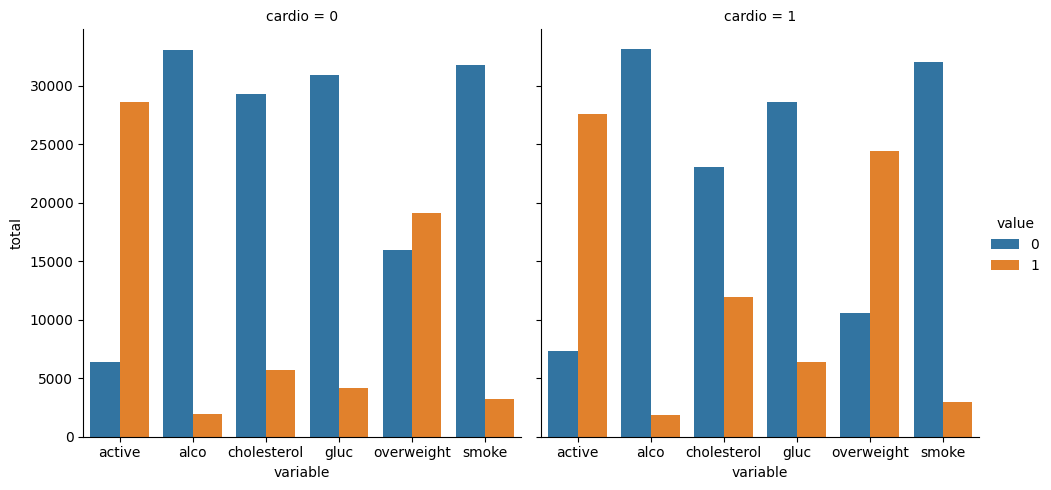

In [50]:
# Draw the catplot with 'sns.catplot()'
fig = sns.catplot(x = 'variable', y = 'total', data=df_cat, hue='value', kind='bar', col='cardio')

In [51]:
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = df.melt(id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat['total'] = 1
    df_cat = df_cat.groupby(by=['cardio', 'variable', 'value'], as_index=False).count()
    

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(x='variable', y='total', data=df_cat, hue='value', kind='bar', col='cardio').fig

Draw Heat Map

In [52]:
# Clean the data
df_heat = df.loc[df['ap_lo'] <= df['ap_hi']]
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [53]:
df_heat = df.loc[df['height'] >= df['height'].quantile(0.025)]
df_heat = df.loc[df['height'] <= df['height'].quantile(0.975)]
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [54]:
df_heat = df.loc[df['weight'] >= df['weight'].quantile(0.025)]
df_heat = df.loc[df['weight'] <= df['weight'].quantile(0.975)]
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [55]:
# Calculate the correlation matrix
corr = df_heat.corr(method='pearson')
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.003120,0.002321,-0.004658,-0.003559,0.003414,-0.002585,0.003941,0.000886,-0.003598,0.001080,0.003494,0.003029,-0.001284
age,0.003120,1.000000,-0.021693,-0.081044,0.065266,0.020703,0.018661,0.131435,0.088171,-0.045043,-0.028798,-0.010400,0.241494,0.093900
sex,0.002321,-0.021693,1.000000,0.493498,0.165414,0.005701,0.014955,-0.037085,-0.020268,0.338337,0.169876,0.006912,0.005299,-0.045233
height,-0.004658,-0.081044,0.493498,1.000000,0.304947,0.004879,0.005005,-0.056105,-0.025236,0.186168,0.092319,-0.005593,-0.016838,-0.128426
weight,-0.003559,0.065266,0.165414,0.304947,1.000000,0.029517,0.038265,0.128224,0.103992,0.065468,0.065371,-0.016151,0.176549,0.650793
ap_hi,0.003414,0.020703,0.005701,0.004879,0.029517,1.000000,0.015261,0.024174,0.012138,-0.001282,0.001096,0.000115,0.053637,0.020169
ap_lo,-0.002585,0.018661,0.014955,0.005005,0.038265,0.015261,1.000000,0.025398,0.012734,0.003759,0.011063,0.004340,0.063831,0.028216
cholesterol,0.003941,0.131435,-0.037085,-0.056105,0.128224,0.024174,0.025398,1.000000,0.380944,0.014381,0.041340,0.006279,0.204596,0.129348
gluc,0.000886,0.088171,-0.020268,-0.025236,0.103992,0.012138,0.012734,0.380944,1.000000,-0.002550,0.016200,-0.008318,0.089815,0.090631
smoke,-0.003598,-0.045043,0.338337,0.186168,0.065468,-0.001282,0.003759,0.014381,-0.002550,1.000000,0.341707,0.029033,-0.018151,-0.004306


In [56]:
# Generate a mask for the upper triangle
mask = np.triu(corr)

<Axes: >

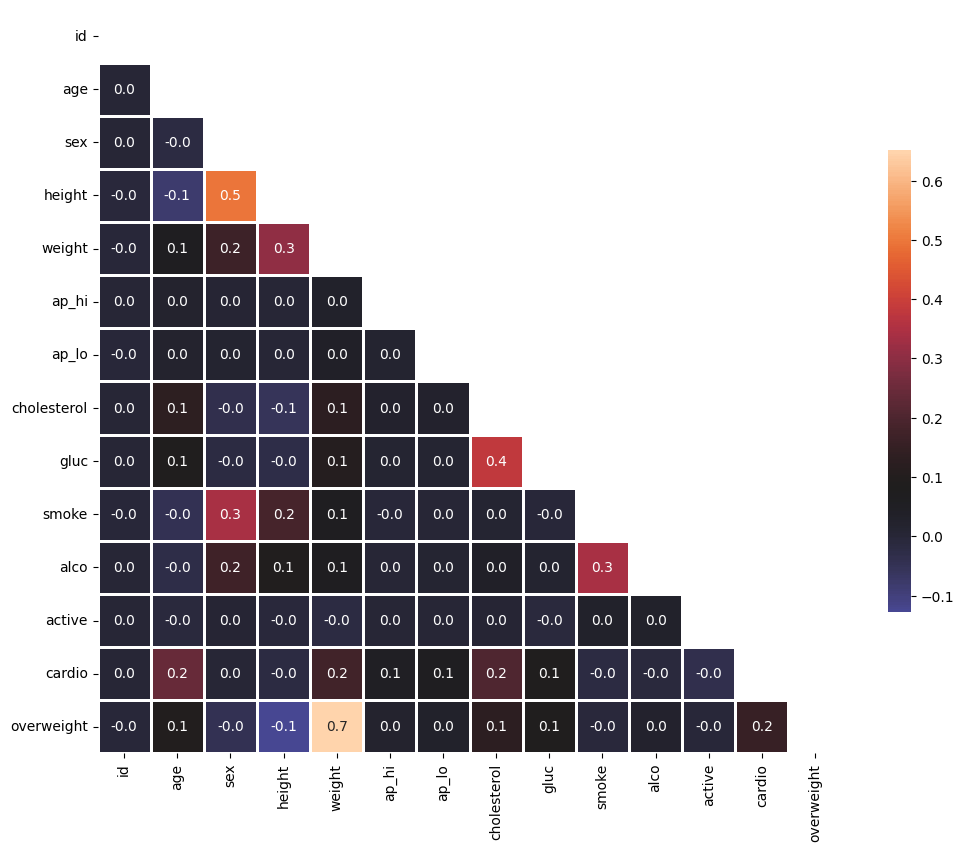

In [57]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 12))


# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(data=corr, linewidths=1, annot=True, square=True, mask=mask, fmt='.1f', center=0.08, cbar_kws={'shrink': 0.5})

In [58]:
def draw_heat_map():
    # Clean the data
    df_heat = df.loc[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(corr)


    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 12))


    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(data=corr, linewidths=1, annot=True, square=True, mask=mask, fmt='.1f', center=0.08, cbar_kws={'shrink': 0.5})

# Tests

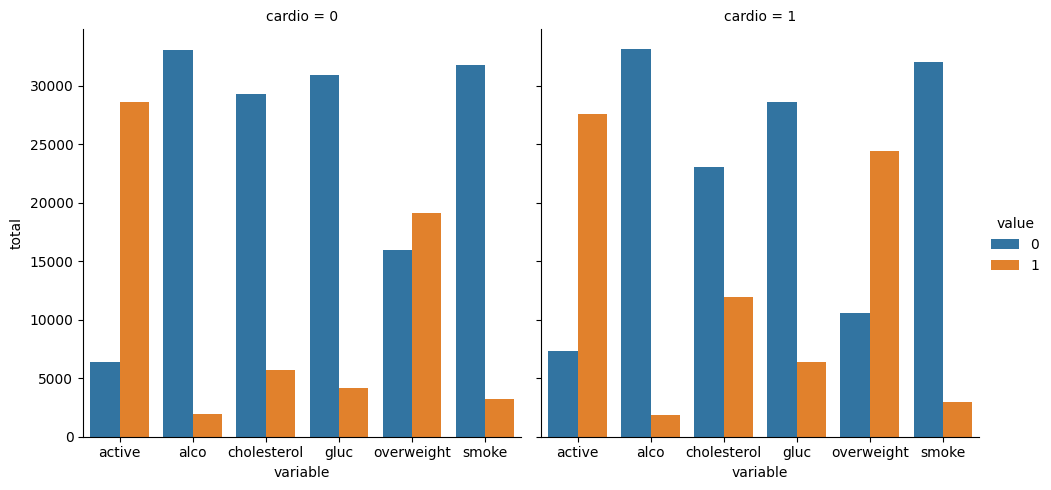

In [59]:
draw_cat_plot()

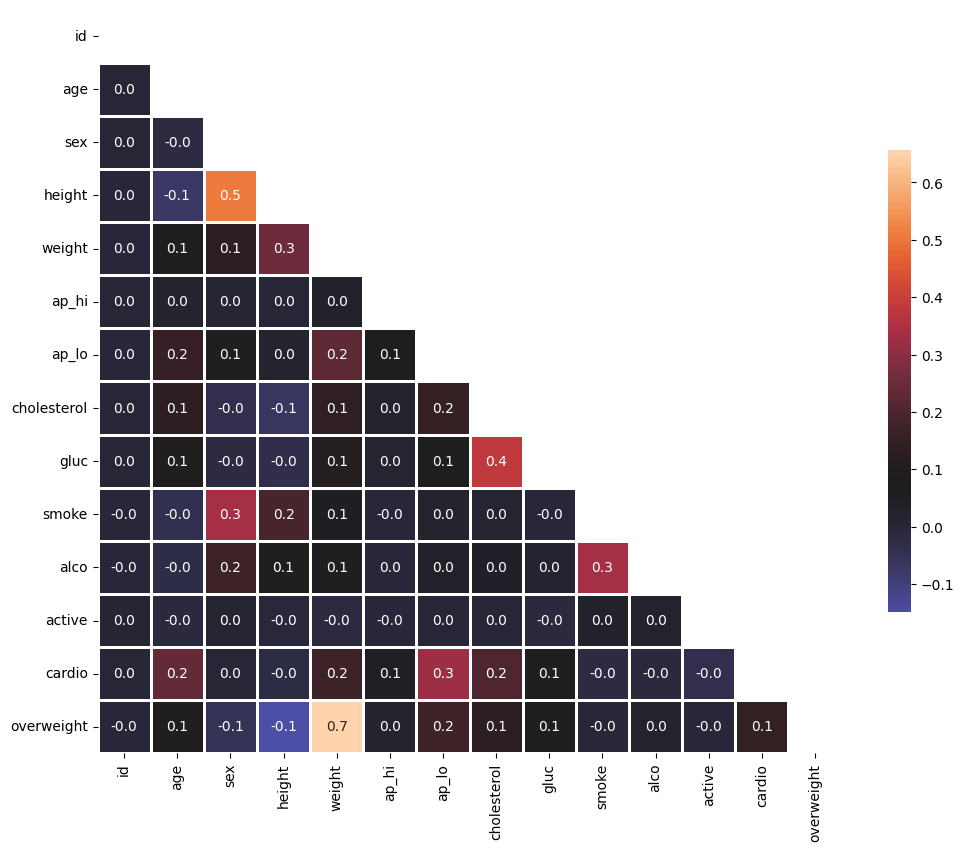

In [60]:
draw_heat_map()